In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Firing rate estimation and convolution

In [2]:
spikes = np.loadtxt('ExampleSpikeTimes1.dat') # in ms
######Hint: it is convenient to convert the data in seconds.
spikes = spikes/1000 # in seconds

### (a) Plot the raw spike train. Have a look at the pyplot function eventplot. You may need to set the axes limits manually for correct visualization.

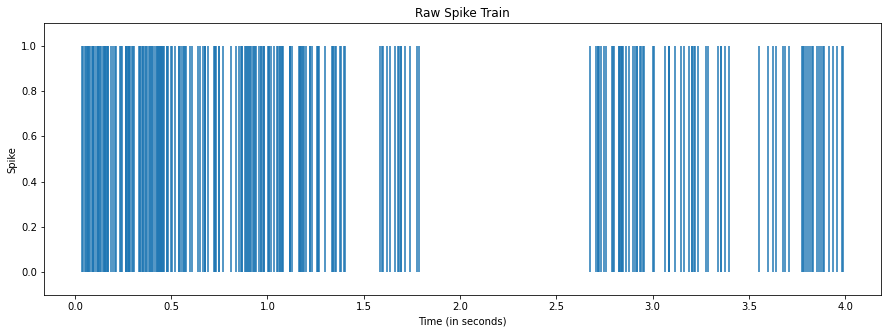

In [3]:
def plot_raw_spike() :
    plt.figure(figsize=(15,5))
    plt.eventplot(spikes, lineoffsets=0.50) # lineoffset is to negate the affect of spike amplitute starting from 0.5
    plt.title('Raw Spike Train')
    plt.xlabel('Time (in seconds)')
    plt.ylabel('Spike')
    plt.ylim(-0.1, 1.1)

plot_raw_spike();

### (b) Construct spike-count histograms with non-overlapping bins of widths Dt = 20, 50 and 150 ms, and normalize them to obtain a firing rate in spikes/s. Hint: Have a look at the pyplot function hist and the weights parameter.

#### Binning method for Temporal average

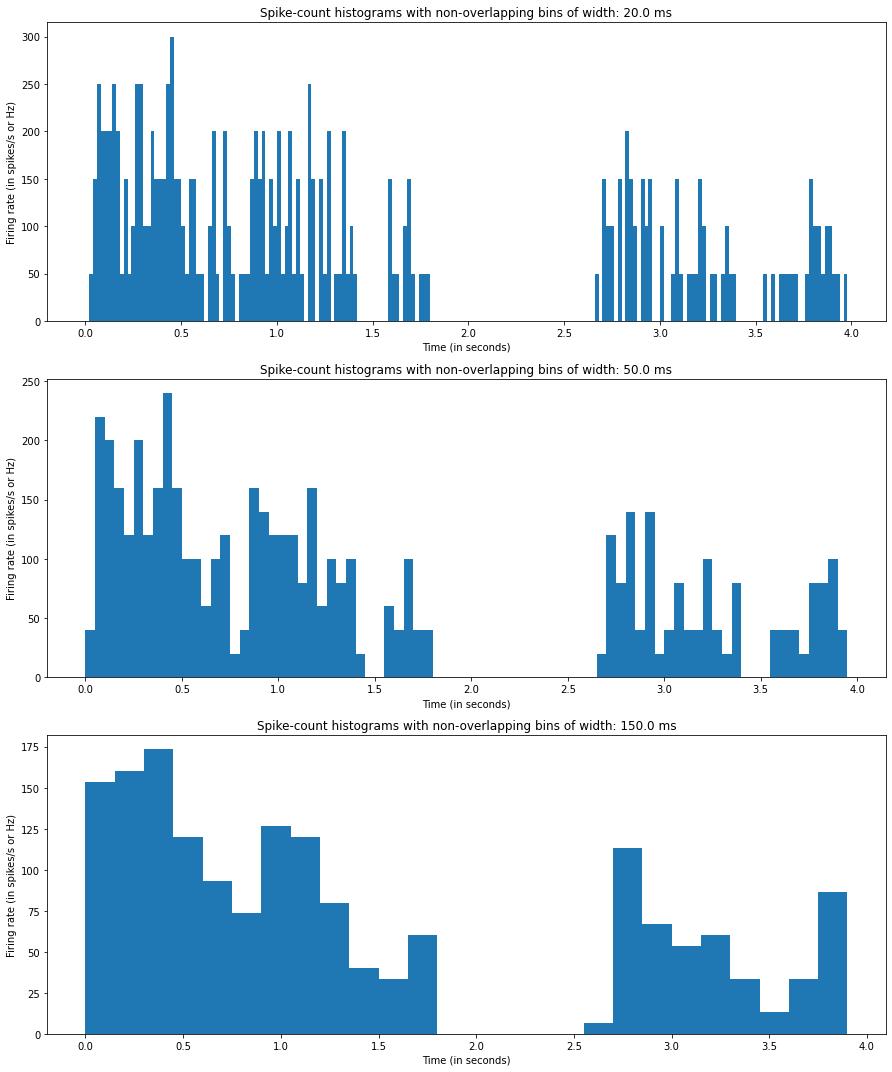

In [4]:
bin_widths = np.array([0.02, 0.05, 0.15]) # in seconds

fig, axes = plt.subplots(nrows=bin_widths.size, ncols=1, figsize=(12.5, 15))
for i in range(bin_widths.size):
    axes[i].hist(spikes, bins = np.arange(0,4, bin_widths[i]), weights = 1/bin_widths[i]* np.ones(spikes.shape))
    axes[i].set_title(f"Spike-count histograms with non-overlapping bins of width: {bin_widths[i] * 1000} ms")
    axes[i].set_xlabel('Time (in seconds)')
    axes[i].set_ylabel('Firing rate (in spikes/s or Hz)')
    fig.tight_layout()

### (c) Filtering for Temporal average : Use the window functions to estimate an approximate firing rate

In [5]:
T =  4 # in seconds
del_t = 1e-4

In [6]:
## generating neual response given by dirac delta function
neural_response = np.zeros(int(T/del_t))
spike_idx = (spikes/del_t).astype(int)
neural_response[spike_idx] = 1

#### (i) Estimate the rate with a rectangular window

In [7]:
def rect_window_kernel(kernel_del_t, del_t):
    return (1/kernel_del_t * np.ones(int(kernel_del_t/del_t)))

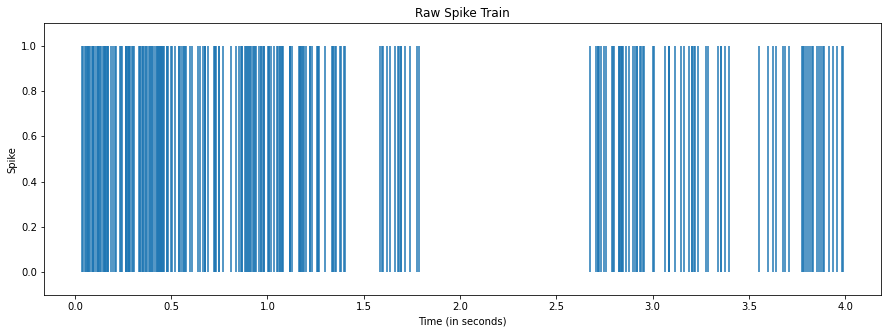

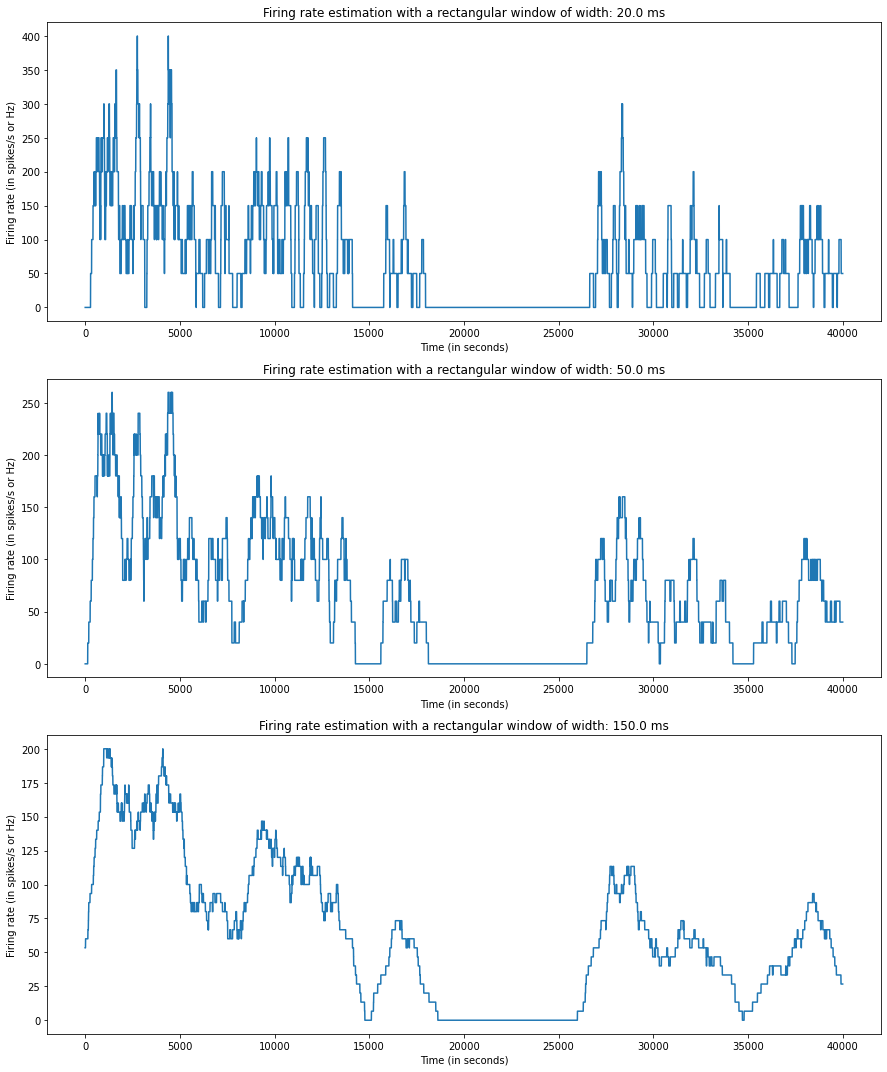

In [8]:
plot_raw_spike();

rect_window_widths = np.array([0.02, 0.05, 0.15]) # in seconds

fig, axes = plt.subplots(nrows=rect_window_widths.size, ncols=1, figsize=(12.43, 15))
for i in range(rect_window_widths.size):
    rect_kernel =  rect_window_kernel(rect_window_widths[i], del_t)
    rect_firing_rate = np.convolve(neural_response, rect_kernel, mode='same') # mode = 'same', so that the time offsets matches
    axes[i].plot(rect_firing_rate)
    axes[i].set_title(f"Firing rate estimation with a rectangular window of width: {rect_window_widths[i] * 1000} ms")
    axes[i].set_xlabel('Time (in seconds)')
    axes[i].set_ylabel('Firing rate (in spikes/s or Hz)')
    fig.tight_layout();

#### (ii.) Estimate the rate with a Gaussian window

In [9]:
def gaussian_kernel(sigma, T, del_t):
    tau = np.arange(-T*0.5, T*0.5, step =del_t)
    return 1/(sigma*np.sqrt(2*np.pi))* np.exp(-0.5*(tau/sigma)**2)

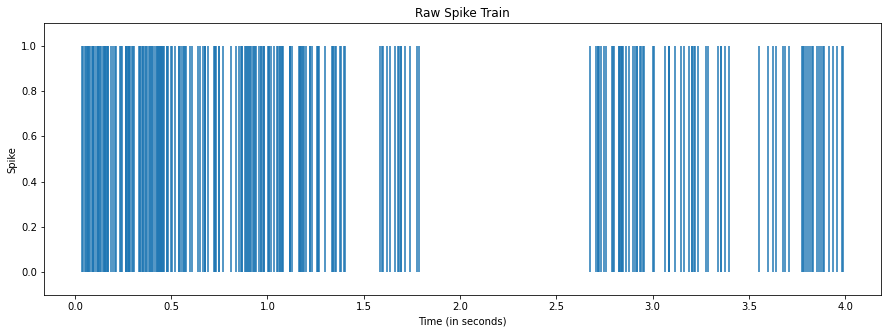

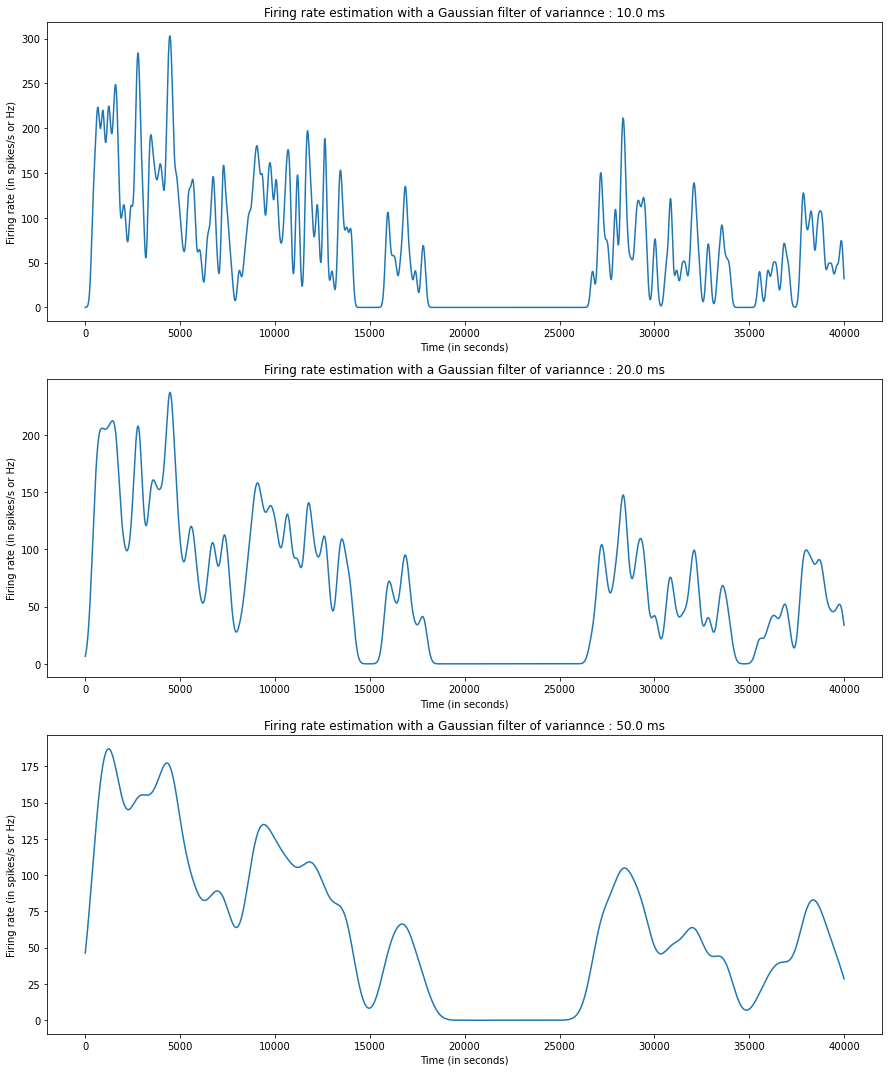

In [10]:
plot_raw_spike();

sigmas = np.array([0.01, 0.02, 0.05]) # in seconds

fig, axes = plt.subplots(nrows=sigmas.size, ncols=1, figsize=(12.45, 15))
for i in range(sigmas.size):
    gauss_kernel =  gaussian_kernel(sigmas[i], T, del_t)
    gauss_firing_rate = np.convolve(neural_response, gauss_kernel, mode='same') # mode = 'same', so that the time offsets matches
    axes[i].plot(gauss_firing_rate)
    axes[i].set_title(f"Firing rate estimation with a Gaussian filter of variannce : {sigmas[i] * 1000} ms")
    axes[i].set_xlabel('Time (in seconds)')
    axes[i].set_ylabel('Firing rate (in spikes/s or Hz)')
    fig.tight_layout()

#### (iii.) Estimate the rate with an alpha function : Here the rate starts rising only after a spike is emitted, i.e., the filter is causal.

In [11]:
def alpha_kernel_func(axes, reci_aplha, T, del_t):
    tau = np.arange(-T*0.5, T*0.5, step =del_t)
    alpha = 1/(reci_aplha)
    alpha_func = (alpha**2)*tau*np.exp(-alpha*tau)
    alpha_func = np.where(alpha_func > 0, alpha_func, 0) # half-wave rectification function
    return alpha_func

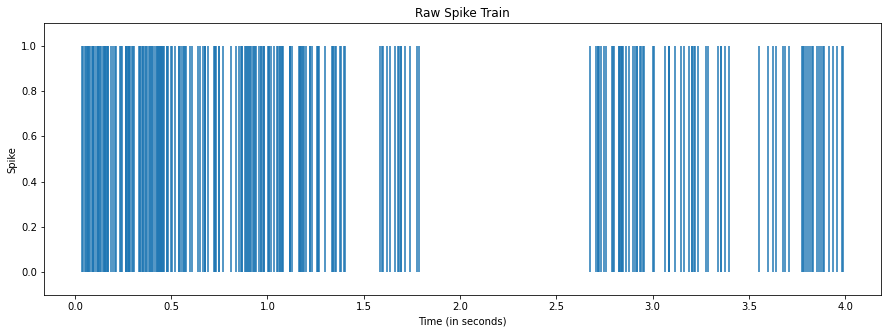

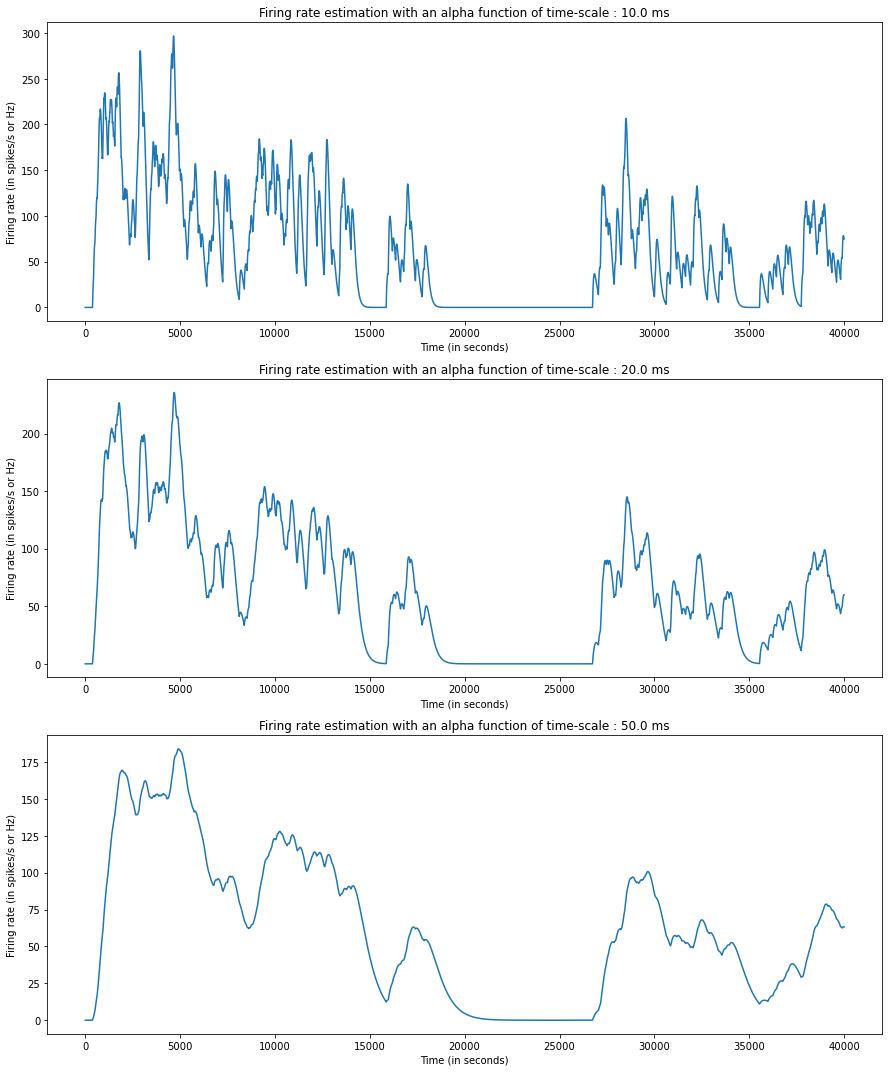

In [12]:
plot_raw_spike();

reciprocal_alphas = np.array([0.01, 0.02, 0.05]) # in seconds

fig, axes = plt.subplots(nrows=reciprocal_alphas.size, ncols=1, figsize=(12.45, 15))
for i in range(reciprocal_alphas.size):
    alpha_kernel =  alpha_kernel_func(axes[i], reciprocal_alphas[i], T, del_t)
    alpha_firing_rate = np.convolve(neural_response, alpha_kernel, mode='same') # mode = 'same', so that the time offsets matches
    axes[i].plot(alpha_firing_rate)
    axes[i].set_title(f"Firing rate estimation with an alpha function of time-scale : {reciprocal_alphas[i] * 1000} ms")
    axes[i].set_xlabel('Time (in seconds)')
    axes[i].set_ylabel('Firing rate (in spikes/s or Hz)')
    fig.tight_layout()

#### Why would one want to use a causal rather than a non-causal filter?

Non causal means without any stimulus there can be non negative firing rate, i.e. if we extend to negative time, the filter would result in a non-zero firing rate. This is not a valid biological scenario, thus we should be using a causal filter rather than a non-causal filter.

### (d) Calculate the spike count-rate

In [13]:
r = np.sum(neural_response)/T
print(r)

64.5
